## Exploring Rossmann Drug Store Sales Data

In [206]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('channel_cost_clean.csv', skipinitialspace=True,
                   low_memory=False)

Because we are most interested in the `Date` column that contains the date of sales for each store, we will make sure to process that as a `DateTime` type, and make that the index of our dataframe.

In [207]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

data['Year'] = data.index.year
data['Month'] = data.index.month
data['Week'] = data.index.week

In [208]:
print data.head()

            FTAdWords  FTBing  FTEmail  FTEvent  FTFacebook  FTInfluencer  \
Date                                                                        
2016-04-24        NaN     NaN       71      NaN         271             3   
2016-05-01        NaN     NaN        7      NaN         912             3   
2016-05-08        NaN     NaN       21      0.0        1621            19   
2016-05-15        NaN     NaN        9      0.0        3398            17   
2016-05-22        NaN     NaN       26      0.0        2306            54   

            FTInstagram  FTOrganic  FTPartner  FTSnapchat  ...   \
Date                                                       ...    
2016-04-24           59      11121        NaN         NaN  ...    
2016-05-01          291       3311        NaN       157.0  ...    
2016-05-08         1097       3434        NaN       146.0  ...    
2016-05-15         1536       3678        NaN       148.0  ...    
2016-05-22          790       2091        NaN       120.0 

In [209]:
data.count()

FTAdWords          55
FTBing             43
FTEmail            61
FTEvent            59
FTFacebook         61
FTInfluencer       61
FTInstagram        61
FTOrganic          61
FTPartner          32
FTSnapchat         60
FTTwitter          29
FTYouTube          46
PSAdWords          56
PSBing             19
PSEmail            60
PSEvent            25
PSFacebook         61
PSInfluencer       61
PSInstagram        61
PSOrganic          61
PSPartner           6
PSSnapchat         59
PSTwitter           4
PSYouTube          20
AdWordsSpend       36
BingSpend          13
EmailSpend          0
EventSpend          0
FacebookSpend      46
InfluencerSpend     0
InstagramSpend     46
OrganicSpend        0
PartnerSpend        0
SnapchatSpend      46
TwitterSpend        3
YouTubeSpend       40
Year               61
Month              61
Week               61
dtype: int64

In [210]:
data.describe()

,FTAdWords,FTBing,FTEmail,FTEvent,FTFacebook,FTInfluencer,FTInstagram,FTOrganic,FTPartner,FTSnapchat,...,InfluencerSpend,InstagramSpend,OrganicSpend,PartnerSpend,SnapchatSpend,TwitterSpend,YouTubeSpend,Year,Month,Week
count,55.000000,43.000000,61.000000,59.000000,61.000000,61.000000,61.000000,61.000000,32.000000,60.000000,...,0.0,46.000000,0.0,0.0,46.000000,3.000000,40.000000,61.000000,61.000000,61.000000
mean,373.181818,6.372093,10.459016,1.372881,1276.754098,536.032787,934.065574,4149.327869,1.906250,826.350000,...,NaN,54217.086957,NaN,NaN,55435.195652,5880.666667,7296.725000,2016.409836,6.245902,25.540984
std,305.114192,9.198921,11.420119,2.007729,1109.724420,511.784198,1720.611847,1722.882630,8.818453,1235.112783,...,NaN,41222.643734,NaN,NaN,55411.524824,4863.927460,5123.509409,0.495885,3.254001,14.199265
min,7.000000,0.000000,1.000000,0.000000,74.000000,3.000000,3.000000,1595.000000,0.000000,1.000000,...,NaN,395.000000,NaN,NaN,0.000000,1413.000000,727.000000,2016.000000,1.000000,1.000000
25%,99.000000,0.000000,3.000000,0.000000,232.000000,179.000000,36.000000,3266.000000,0.000000,16.500000,...,NaN,21830.500000,NaN,NaN,0.000000,3290.000000,3366.000000,2016.000000,4.000000,16.000000
50%,367.000000,0.000000,7.000000,1.000000,1231.000000,326.000000,490.000000,3678.000000,0.000000,152.500000,...,NaN,55334.500000,NaN,NaN,44811.500000,5167.000000,7006.500000,2016.000000,6.000000,23.000000
75%,538.500000,12.500000,12.000000,2.000000,1958.000000,820.000000,1043.000000,4808.000000,0.000000,1250.750000,...,NaN,74753.000000,NaN,NaN,85163.500000,8114.500000,10616.250000,2017.000000,9.000000,37.000000
max,1561.000000,28.000000,71.000000,12.000000,5052.000000,2191.000000,10978.000000,11121.000000,50.000000,5155.000000,...,NaN,212378.000000,NaN,NaN,178514.000000,11062.000000,22831.000000,2017.000000,12.000000,52.000000


## Channel: AdWords

         FTAdWords   PSAdWords  AdWordsSpend       Week
count    33.000000   33.000000     33.000000  33.000000
mean    482.545455  255.545455  15114.333333  30.727273
std     304.377961  148.598261  12164.095424   8.743829
min      86.000000   50.000000   1563.000000  17.000000
25%     307.000000  174.000000   3483.000000  23.000000
50%     479.000000  223.000000  10586.000000  30.000000
75%     562.000000  315.000000  26153.000000  38.000000
max    1561.000000  735.000000  40701.000000  46.000000


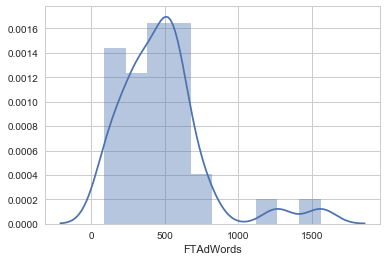

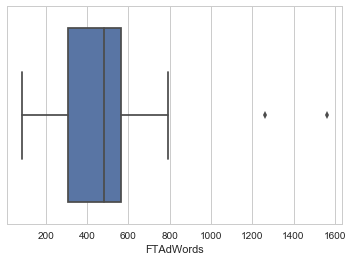

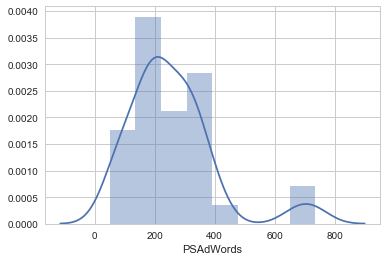

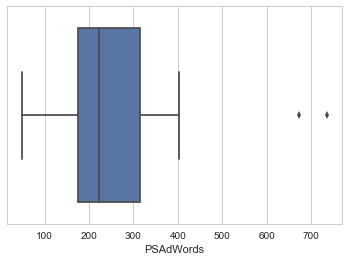

"\nsb.factorplot(\n\n    x='Week',\n    y='FTAdWords',\n    data=adwords_nonnull,\n    kind='box',\n    \n)\n"

In [241]:
adwords_data = data.ix[:, ['FTAdWords', 'PSAdWords','AdWordsSpend', 'Week']]

adwords_data.dropna()
adwords_nonnull=adwords_data.dropna()
adwords_nonnull.describe()
print (adwords_nonnull.describe())


sns.distplot(adwords_nonnull['FTAdWords'])
sns.plt.show()

sns.boxplot(adwords_nonnull['FTAdWords'])
sns.plt.show()

sns.distplot(adwords_nonnull['PSAdWords'])
sns.plt.show()

sns.boxplot(adwords_nonnull['PSAdWords'])
sns.plt.show()

'''
sb.factorplot(

    x='Week',
    y='FTAdWords',
    data=adwords_nonnull,
    kind='box',
    
)
'''

In [235]:
'''
sb.factorplot(

    x='Week',
    y='PSAdWords',
    data=adwords_nonnull,
    kind='box',
    
)
'''

"\nsb.factorplot(\n\n    x='Week',\n    y='PSAdWords',\n    data=adwords_nonnull,\n    kind='box',\n    \n)\n"

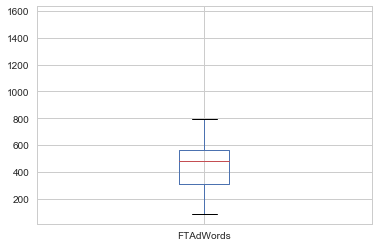

In [213]:
adwords_nonnull['FTAdWords'].plot(kind='box')

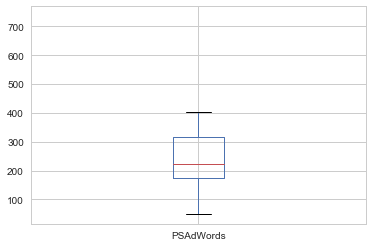

In [214]:
adwords_nonnull['PSAdWords'].plot(kind='box')

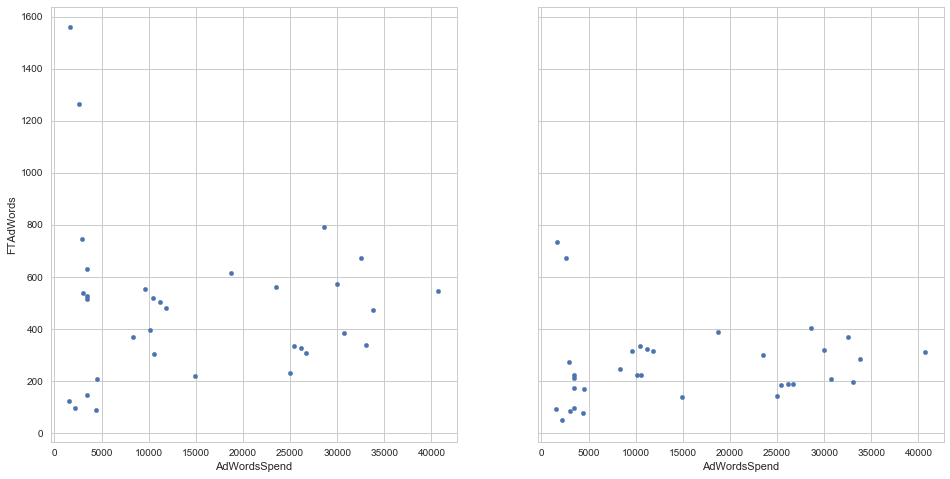

In [215]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 2, sharey=True)
adwords_nonnull.plot(kind='scatter', x='AdWordsSpend', y='FTAdWords', ax=axs[0], figsize=(16, 8))
adwords_nonnull.plot(kind='scatter', x='AdWordsSpend', y='PSAdWords', ax=axs[1])

In [216]:
#Looking At AdWords Spend Effects Free Trials
import statsmodels.formula.api as smf
lm = smf.ols(formula='FTAdWords ~ AdWordsSpend', data=adwords_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FTAdWords   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.1771
Date:                Mon, 03 Jul 2017   Prob (F-statistic):              0.677
Time:                        16:46:09   Log-Likelihood:                -234.93
No. Observations:                  33   AIC:                             473.9
Df Residuals:                      31   BIC:                             476.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      511.0525     86.426      5.913      0.000       334.786   687.319
AdWordsSpend    -0.0019      0.004     -0.421      0.677        -0.011     0.007
==============================================================================
Omnibus:                       19.925   Durbin-Watson:                   0.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.225
Skew:                           1.536   Prob(JB):                     4.51e-07
Kurtosis:                       6.438   Cond. No.                     3.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
#Looking At AdWords Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm = smf.ols(formula='PSAdWords ~ AdWordsSpend', data=adwords_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PSAdWords   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.029
Method:                 Least Squares   F-statistic:                    0.1021
Date:                Mon, 03 Jul 2017   Prob (F-statistic):              0.751
Time:                        16:46:09   Log-Likelihood:                -211.30
No. Observations:                  33   AIC:                             426.6
Df Residuals:                      31   BIC:                             429.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      244.9641     42.244      5.799      0.000       158.807   331.121
AdWordsSpend     0.0007      0.002      0.320      0.751        -0.004     0.005
==============================================================================
Omnibus:                       21.116   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.796
Skew:                           1.661   Prob(JB):                     2.05e-07
Kurtosis:                       6.370   Cond. No.                     3.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Channel: Facebook

        FTFacebook   PSFacebook  FacebookSpend       Week
count    46.000000    46.000000      46.000000  46.000000
mean   1640.304348   806.173913   79721.913043  27.239130
std    1043.393712   481.909365   44562.541277  10.396976
min      91.000000    49.000000     843.000000  11.000000
25%     997.500000   441.750000   43339.250000  19.000000
50%    1603.000000   814.500000   86978.500000  24.500000
75%    2138.000000  1055.250000  105286.250000  35.750000
max    5052.000000  1913.000000  159965.000000  47.000000


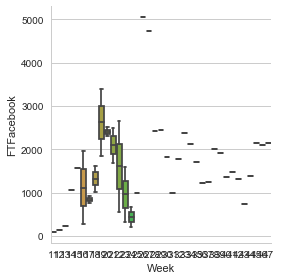

In [218]:
facebook_data = data.ix[:, ['FTFacebook', 'PSFacebook','FacebookSpend', 'Week']]

facebook_data.dropna()
facebook_nonnull=facebook_data.dropna()
facebook_nonnull.describe()
print (facebook_nonnull.describe())

sb.factorplot(

    x='Week',
    y='FTFacebook',
    data=facebook_nonnull,
    kind='box',
    
)

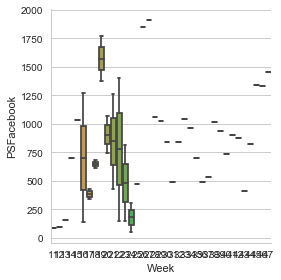

In [219]:
sb.factorplot(

    x='Week',
    y='PSFacebook',
    data=facebook_nonnull,
    kind='box',
    
)

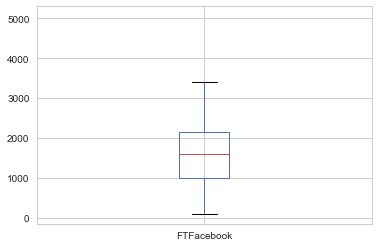

In [220]:
facebook_nonnull['FTFacebook'].plot(kind='box')

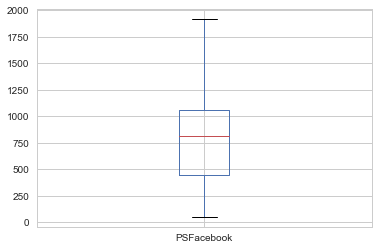

In [221]:
facebook_nonnull['PSFacebook'].plot(kind='box')

In [222]:
#Looking At Facebook Spend Effects Free Trials
import statsmodels.formula.api as smf
lm = smf.ols(formula='FTFacebook ~ FacebookSpend', data=facebook_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             FTFacebook   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     49.34
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           1.05e-08
Time:                        16:46:13   Log-Likelihood:                -367.18
No. Observations:                  46   AIC:                             738.4
Df Residuals:                      44   BIC:                             742.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       283.1793    220.770      1.283      0.206      -161.752   728.111
FacebookSpend     0.0170      0.002      7.024      0.000         0.012     0.022
==============================================================================
Omnibus:                       33.073   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.944
Skew:                           2.017   Prob(JB):                     3.23e-17
Kurtosis:                       7.832   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
#Looking At Facebook Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm = smf.ols(formula='PSFacebook ~ FacebookSpend', data=facebook_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             PSFacebook   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     62.28
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           5.78e-10
Time:                        16:46:13   Log-Likelihood:                -328.66
No. Observations:                  46   AIC:                             661.3
Df Residuals:                      44   BIC:                             665.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept       146.2185     95.559      1.530      0.133       -46.368   338.805
FacebookSpend     0.0083      0.001      7.891      0.000         0.006     0.010
==============================================================================
Omnibus:                       12.593   Durbin-Watson:                   1.130
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.187
Skew:                           1.073   Prob(JB):                      0.00137
Kurtosis:                       4.509   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

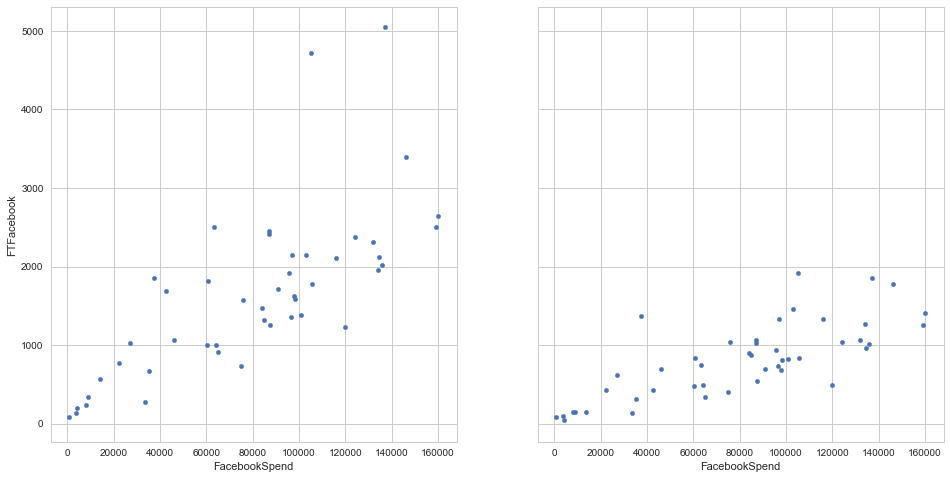

In [224]:
fig, axs = plt.subplots(1, 2, sharey=True)
facebook_nonnull.plot(kind='scatter', x='FacebookSpend', y='FTFacebook', ax=axs[0], figsize=(16, 8))
facebook_nonnull.plot(kind='scatter', x='FacebookSpend', y='PSFacebook', ax=axs[1])

## Channel: Instagram

In [225]:
instagram_data = data.ix[:, ['FTInstagram', 'PSInstagram', 'InstagramSpend', 'Week']]

instagram_data.dropna()
instagram_nonnull=instagram_data.dropna()
instagram_nonnull.describe()
print (instagram_nonnull.describe())


        FTInstagram  PSInstagram  InstagramSpend       Week
count     46.000000    46.000000       46.000000  46.000000
mean    1232.978261   469.826087    54217.086957  27.239130
std     1890.987966   637.968418    41222.643734  10.396976
min       10.000000     5.000000      395.000000  11.000000
25%      398.500000   173.250000    21830.500000  19.000000
50%      834.000000   345.000000    55334.500000  24.500000
75%     1249.500000   531.000000    74753.000000  35.750000
max    10978.000000  3618.000000   212378.000000  47.000000


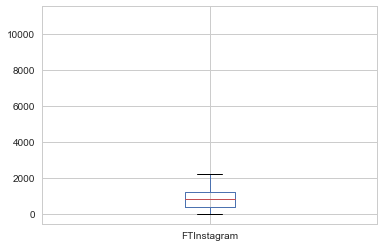

In [226]:
instagram_nonnull['FTInstagram'].plot(kind='box')

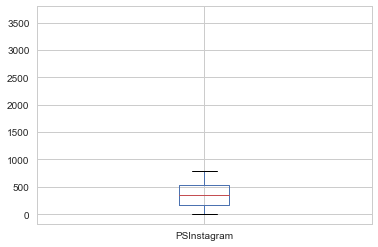

In [227]:
instagram_nonnull['PSInstagram'].plot(kind='box')

In [228]:
#Looking At Facebook Spend Effects Free Trial
import statsmodels.formula.api as smf
lm = smf.ols(formula='FTInstagram ~ InstagramSpend', data=instagram_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            FTInstagram   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     82.21
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           1.25e-11
Time:                        16:46:17   Log-Likelihood:                -387.59
No. Observations:                  46   AIC:                             779.2
Df Residuals:                      44   BIC:                             782.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       -774.2647    277.001     -2.795      0.008     -1332.523  -216.006
InstagramSpend     0.0370      0.004      9.067      0.000         0.029     0.045
==============================================================================
Omnibus:                       18.936   Durbin-Watson:                   0.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.308
Skew:                           1.195   Prob(JB):                     1.59e-07
Kurtosis:                       6.259   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [202]:
#Looking At Facebook Spend Effects Pay Subs
import statsmodels.formula.api as smf
lm = smf.ols(formula='PSInstagram ~ InstagramSpend', data=instagram_nonnull).fit()
#print the full summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PSInstagram   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     90.87
Date:                Mon, 03 Jul 2017   Prob (F-statistic):           2.86e-12
Time:                        16:38:40   Log-Likelihood:                -336.08
No. Observations:                  46   AIC:                             676.2
Df Residuals:                      44   BIC:                             679.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       -218.9142     90.399     -2.422      0.020      -401.102   -36.726
InstagramSpend     0.0127      0.001      9.533      0.000         0.010     0.015
==============================================================================
Omnibus:                       18.724   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.673
Skew:                           1.186   Prob(JB):                     2.18e-07
Kurtosis:                       6.222   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

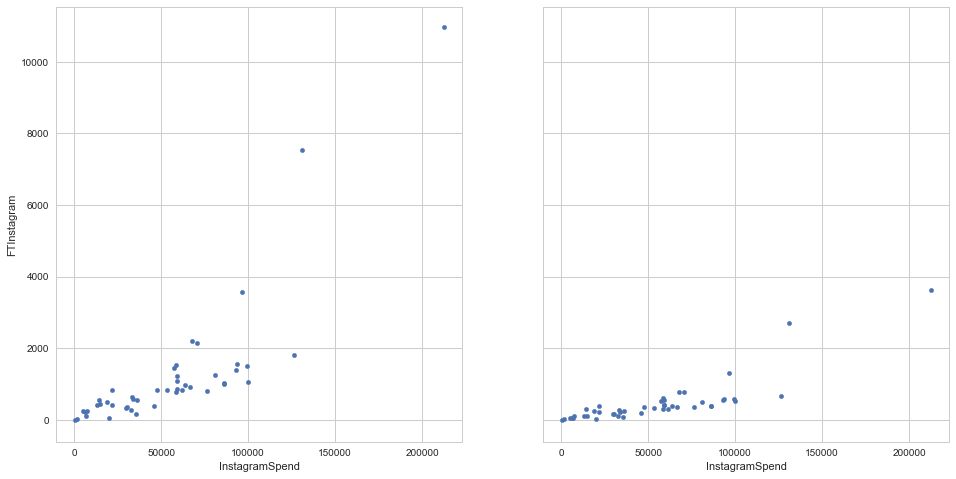

In [204]:
fig, axs = plt.subplots(1, 2, sharey=True)
instagram_nonnull.plot(kind='scatter', x='InstagramSpend', y='FTInstagram', ax=axs[0], figsize=(16, 8))
instagram_nonnull.plot(kind='scatter', x='InstagramSpend', y='PSInstagram', ax=axs[1])

## All Channels

                FTAdWords  PSAdWords  AdWordsSpend  FTInstagram  PSInstagram  \
FTAdWords        1.000000   0.947443     -0.075375     0.086634     0.099006   
PSAdWords        0.947443   1.000000      0.114138     0.188140     0.207916   
AdWordsSpend    -0.075375   0.114138      1.000000    -0.035464    -0.019217   
FTInstagram      0.086634   0.188140     -0.035464     1.000000     0.996770   
PSInstagram      0.099006   0.207916     -0.019217     0.996770     1.000000   
InstagramSpend  -0.007893   0.209701      0.277419     0.807069     0.820835   
FTFacebook       0.227515   0.301636      0.088797     0.768772     0.793085   
PSFacebook       0.195921   0.297292      0.184539     0.616404     0.657216   
FacebookSpend   -0.040234   0.157429      0.517413     0.345793     0.370659   

                InstagramSpend  FTFacebook  PSFacebook  FacebookSpend  
FTAdWords            -0.007893    0.227515    0.195921      -0.040234  
PSAdWords             0.209701    0.301636    0.297292 

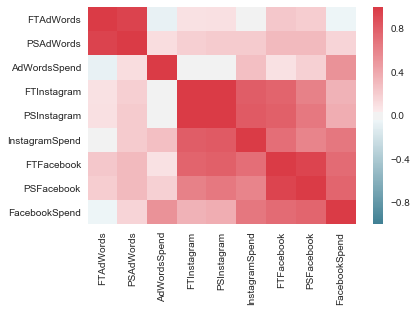

In [192]:
channel_data = data.ix[:, ['FTAdWords', 'PSAdWords','AdWordsSpend','FTInstagram', 'PSInstagram', 'InstagramSpend','FTFacebook', 'PSFacebook','FacebookSpend', 'Week']]

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = channel_data[['FTAdWords', 'PSAdWords','AdWordsSpend','FTInstagram', 'PSInstagram', 'InstagramSpend','FTFacebook', 'PSFacebook', 'FacebookSpend']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)